<a href="https://colab.research.google.com/github/johnatanDM/MachineLearning/blob/main/Alura_Machine_Learning02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

resultados_exames = pd.read_csv("https://github.com/alura-cursos/reducao-dimensionalidade/raw/master/data-set/exames.csv")
resultados_exames.head()


,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [ ]:
#separar dataset em treino e teste
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed = SEED

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnosticos = resultados_exames.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames, diagnosticos)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print(classificador.score(teste_x, teste_y))

ValueError: ignored

In [ ]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [ ]:
#separar dataset em treino e teste
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed = SEED

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnosticos = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33")

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnosticos, test_size = 0.3)


classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print("Resultado da Classificação: %.2f%%" % (classificador.score(teste_x, teste_y)*100))

Resultado da Classificação: 96.49%


In [ ]:
from sklearn.dummy import DummyClassifier
from numpy import random
SEED = 42
random.seed = SEED

classificador_bobo = DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(treino_x, treino_y)

print("Resultado da Classificação boba: %.2f%%" % (classificador_bobo.score(teste_x, teste_y)*100))

Resultado da Classificação boba: 58.48%


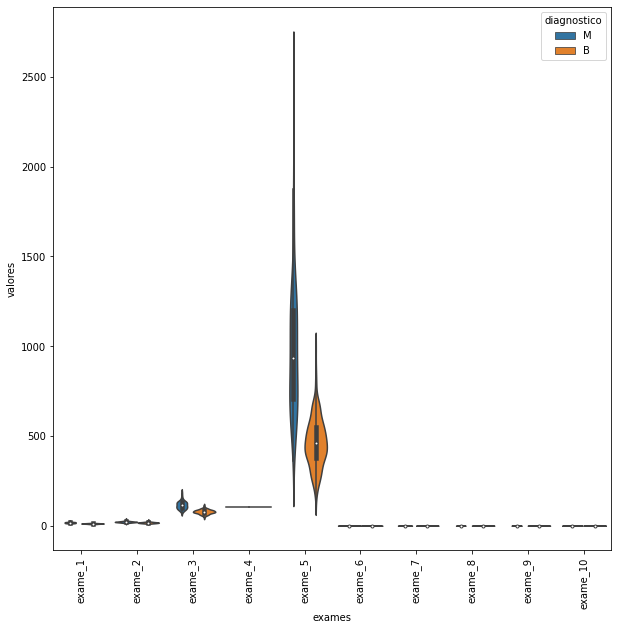

In [ ]:
#Visualizando os dados
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnosticos, valores_exames_v1.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot)

In [ ]:
valores_exames_v1.keys

<bound method NDFrame.keys of      exame_1  exame_2  exame_3  exame_4  ...  exame_29  exame_30  exame_31  exame_32
0      17.99    10.38   122.80   103.78  ...     0.786    0.2654    0.4601   0.11890
1      20.57    17.77   132.90   103.78  ...     0.786    0.1860    0.2750   0.08902
2      19.69    21.25   130.00   103.78  ...     0.786    0.2430    0.3613   0.08758
3      11.42    20.38    77.58   103.78  ...     0.786    0.2575    0.6638   0.17300
4      20.29    14.34   135.10   103.78  ...     0.786    0.1625    0.2364   0.07678
..       ...      ...      ...      ...  ...       ...       ...       ...       ...
564    21.56    22.39   142.00   103.78  ...     0.786    0.2216    0.2060   0.07115
565    20.13    28.25   131.20   103.78  ...     0.786    0.1628    0.2572   0.06637
566    16.60    28.08   108.30   103.78  ...     0.786    0.1418    0.2218   0.07820
567    20.60    29.33   140.10   103.78  ...     0.786    0.2650    0.4087   0.12400
568     7.76    24.54    47.92   10

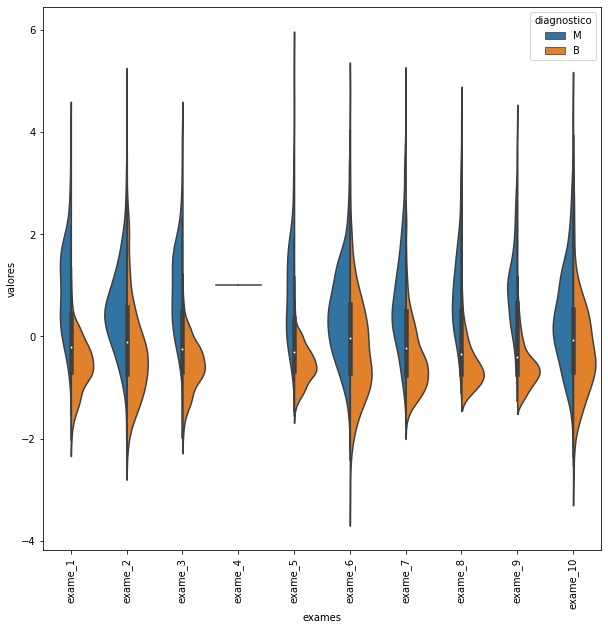

In [ ]:
#Visualizando os dados
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnosticos, valores_exames_v2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split= True)

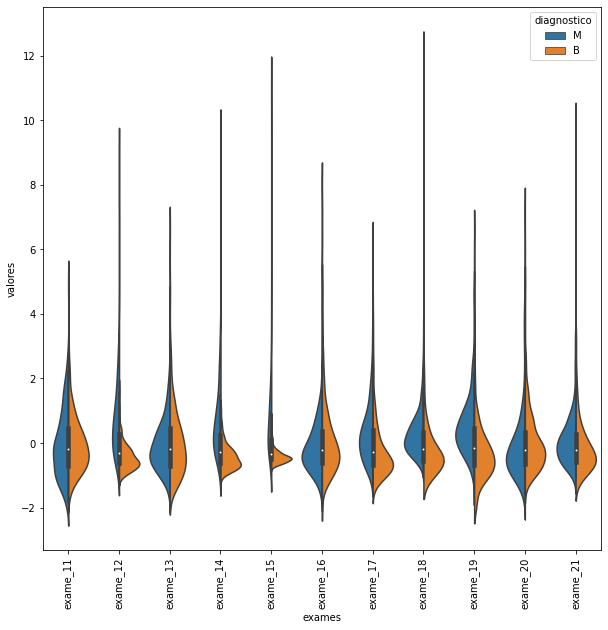

In [ ]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnosticos, valores.iloc[:,inicio:fim]], axis=1)
  dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

  plt.figure(figsize=(10, 10))
  plt.xticks(rotation=90)
  sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split= True)

grafico_violino(valores_exames_v2, 10, 21)

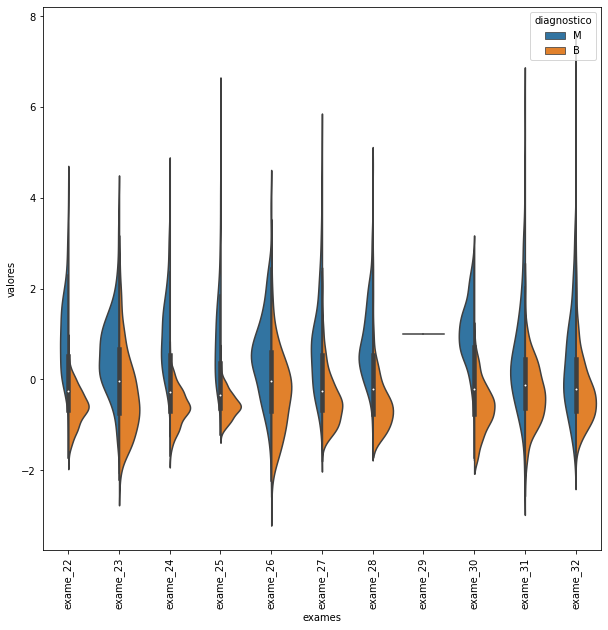

In [ ]:

grafico_violino(valores_exames_v2, 21, 32)

In [ ]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29", "exame_4"])

def classificar(valores):
  SEED = 42
  random.seed = SEED
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnosticos, test_size = 0.3)

  classificador = RandomForestClassifier(n_estimators = 100)
  classificador.fit(treino_x, treino_y)
  print("Resultado da Classificação: %.2f%%" % (classificador.score(teste_x, teste_y)*100))

classificar(valores_exames_v3)

Resultado da Classificação: 94.74%


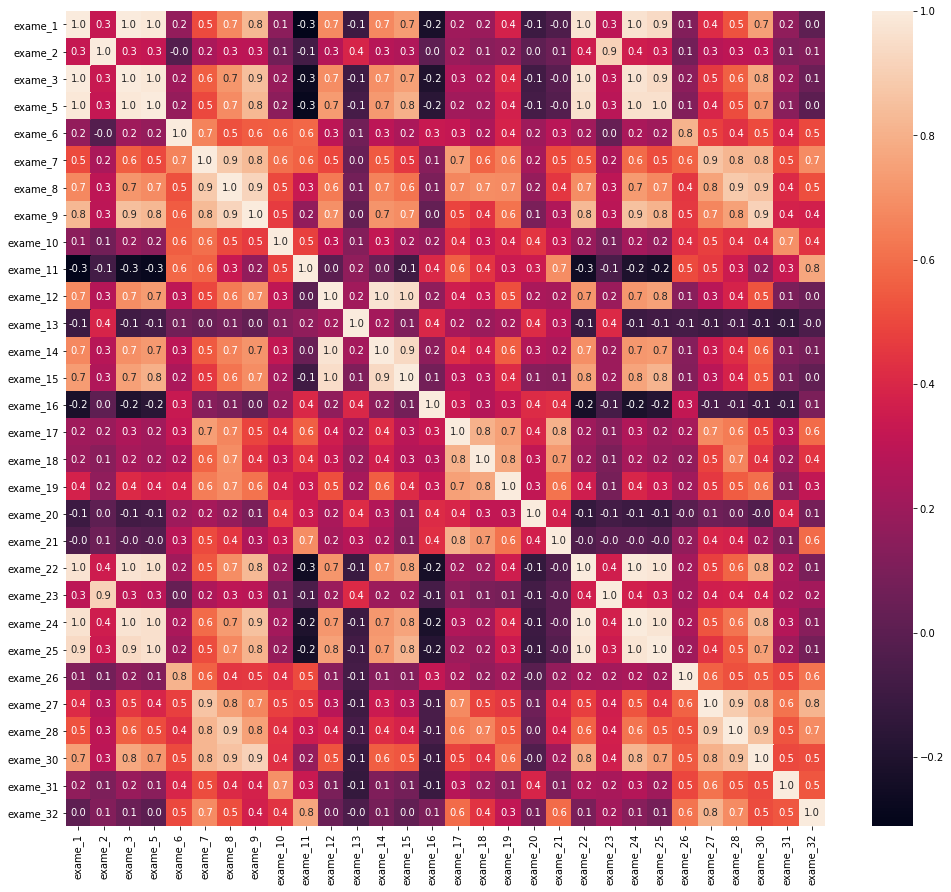

In [ ]:
#verificar correlação
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot=True, fmt=".1f")

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [ ]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [ ]:
valores_exames_v4 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
valores_exames_v4

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,exame_14,exame_15,exame_16,exame_17,exame_18,exame_19,exame_20,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
classificar(valores_exames_v4)

Resultado da Classificação: 97.08%


In [ ]:
#selecionar as k melhores features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
SEED = 42
random.seed = SEED
selecione_kmelhores = SelectKBest(chi2, k = 5)

valores_exames_v5 = valores_exames_v1.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnosticos, test_size = 0.3)

selecione_kmelhores.fit(treino_x, treino_y) 

SelectKBest(k=5, score_func=<function chi2 at 0x7fee59756b00>)

In [ ]:
treino_kbest = selecione_kmelhores.transform(treino_x)
teste_kbest = selecione_kmelhores.transform(teste_x)

classificador = RandomForestClassifier(n_estimators=100, random_state=42)
classificador.fit(treino_kbest, treino_y)
print("Resultado da Classificação: %.2f%%" % (classificador.score(teste_kbest, teste_y)*100))

Resultado da Classificação: 91.23%


array([[95, 11],
       [ 4, 61]])

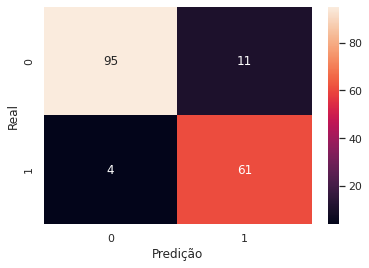

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
sns.set() 
sns.heatmap(matriz_comfusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

matriz_confusao

Resultado da Classificação: 93.57%


array([[108,   2],
       [  9,  52]])

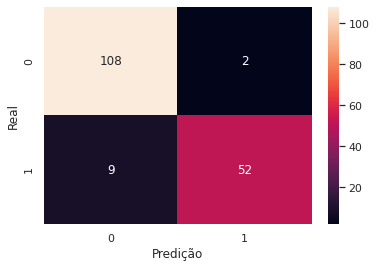

In [ ]:
#usando rfe
from sklearn.feature_selection import RFE

SEED = 42
random.seed = SEED
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnosticos, test_size = 0.3)


classificador = RandomForestClassifier(n_estimators=100, random_state=42)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator=classificador, n_features_to_select=5, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador.fit(treino_rfe, treino_y)
print("Resultado da Classificação: %.2f%%" % (classificador.score(teste_rfe, teste_y)*100))


matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
sns.set() 
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

matriz_confusao

In [ ]:
#rfe crossvalidation
from sklearn.feature_selection import RFECV

SEED = 42
random.seed = SEED
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnosticos, test_size = 0.3)


classificador = RandomForestClassifier(n_estimators=100, random_state=42)
classificador.fit(treino_x, treino_y)

selecionador_rfecv = RFECV(estimator=classificador, cv=5, step=1, scoring="accuracy")
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)

classificador.fit(treino_rfecv, treino_y)
print("Resultado da Classificação: %.2f%%" % (classificador.score(teste_rfecv, teste_y)*100))



Resultado da Classificação: 95.32%


In [ ]:
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_8', 'exame_9', 'exame_12',
       'exame_14', 'exame_15', 'exame_22', 'exame_23', 'exame_25', 'exame_26',
       'exame_27', 'exame_28', 'exame_30'],
      dtype='object')

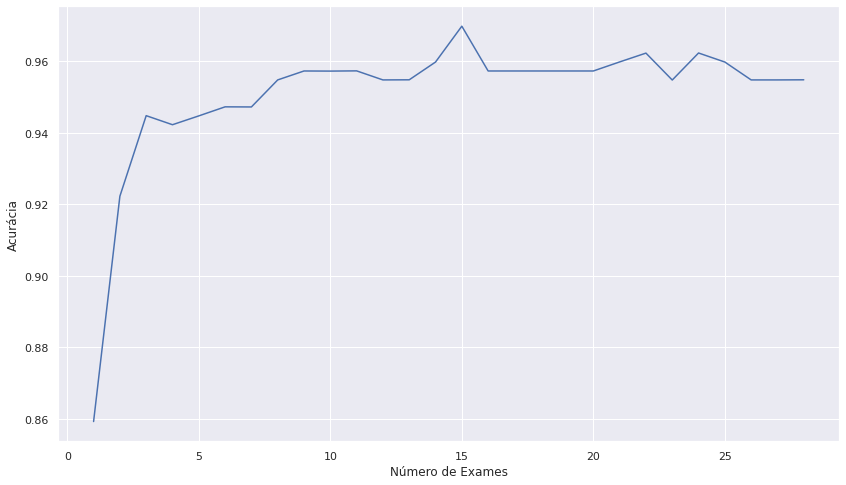

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.xlabel("Número de Exames")
plt.ylabel("Acurácia")
plt.plot(range(1,len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)
plt.show()



In [55]:
#usando rfe com 2 dimensões
from sklearn.feature_selection import RFE

SEED = 42
random.seed = SEED
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnosticos, test_size = 0.3)


classificador = RandomForestClassifier(n_estimators=100, random_state=42)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator=classificador, n_features_to_select=2, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
 

valores_exames_v6 = selecionador_rfe.transform(valores_exames_v5)
valores_exames_v6.shape

(569, 2)

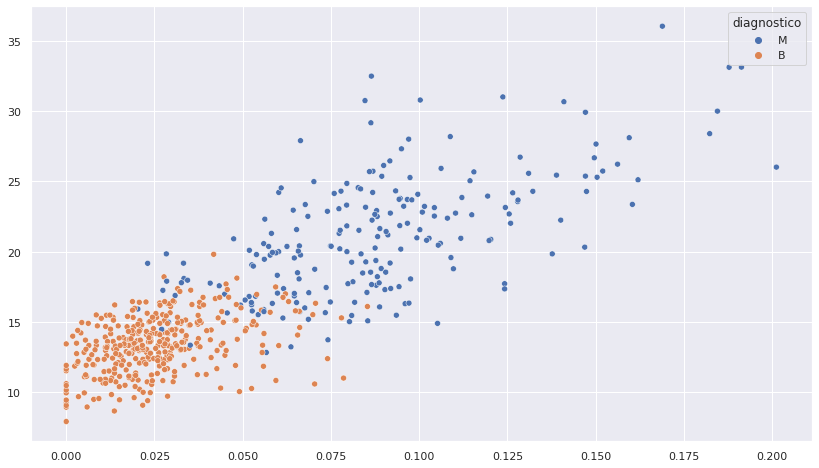

In [56]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v6[:,0], y = valores_exames_v6[:,1], hue = diagnosticos)

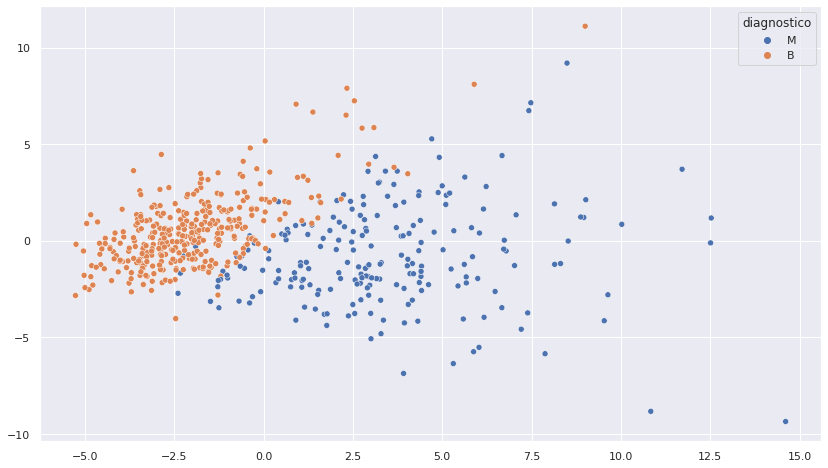

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

valores_exames_v7 = pca.fit_transform(valores_exames_v4)

plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnosticos)

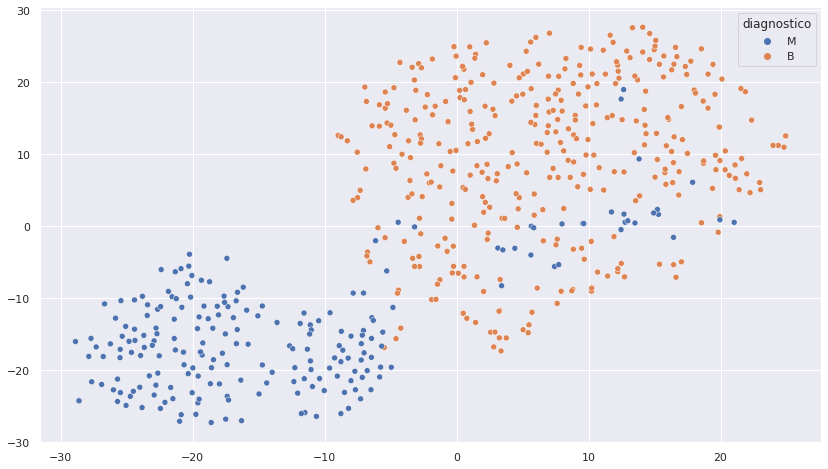

In [64]:
#técnica TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

valores_exames_v8 = tsne.fit_transform(valores_exames_v4)

plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnosticos)